In [199]:
import os
import glob
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from pprint import pprint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Dense, merge
from keras.models import Model
from keras.layers import Convolution2D, MaxPooling2D, Reshape, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from src.learning.processing import parse
data_dir = "src/client/pictures/"
data_save_dir = "datasets/npy/"
big_dir = "tawn_dataset/"
BATCH_SIZE = 16

def normalize_label(old_val, old_min, old_max, new_min, new_max):
    old_val = float(old_val)
    new_val = (((old_val - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
    return new_val

def padding_img_id(string_i):
    padding = 7 - len(string_i)
    for i in range(padding):
        string_i = "0" + string_i
    return string_i

### CAUTION flip only once !

In [200]:
image_paths = []
angle_labels = []
speed_labels = []
for root, dirs, files in os.walk(data_dir):
    nb_data = len(files)
    for file in files:
        if file.endswith(".jpg"):
            filename = os.path.join(root, file)
            image_paths.append(filename)
            s = filename.split("_")
            print("angle:",float(s[1]), "speed:", float(s[2].rstrip(s[2][-4:])))
            angle_labels.append(float(s[1]))
            speed_labels.append(float(s[2].rstrip(s[2][-4:])))
image_paths = np.array(image_paths)
angle_labels = np.array(angle_labels)
speed_labels = np.array(speed_labels)

angle: 99.0 speed: 102.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 83.0
angle: 125.0 speed: 83.0
angle: 125.0 speed: 83.0
angle: 125.0 speed: 83.0
angle: 35.0 speed: 40.0
angle: 125.0 speed: 40.0
angle: 35.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 59.0 speed: 40.0
angle: 57.0 speed: 100.0
angle: 57.0 speed: 92.0
angle: 114.0 speed: 88.0
angle: 125.0 speed: 94.0
angle: 35.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 99.0
angle: 117.0 speed: 102.0
angle: 116.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 114.0 speed: 85.0
angle: 101.0 speed: 60.0
angle: 54.0 speed: 45.0
angle: 40.0 speed: 52.0
angle: 40.0 speed: 77.0
angle: 40.0 speed: 78.0
angle: 40.0 spe

angle: 125.0 speed: 102.0
angle: 126.0 speed: 102.0
angle: 57.0 speed: 102.0
angle: 72.0 speed: 102.0
angle: 74.0 speed: 102.0
angle: 79.0 speed: 102.0
angle: 79.0 speed: 102.0
angle: 79.0 speed: 102.0
angle: 79.0 speed: 102.0
angle: 79.0 speed: 102.0
angle: 205.0 speed: 49.0
angle: 125.0 speed: 50.0
angle: 35.0 speed: 102.0
angle: 35.0 speed: 102.0
angle: 35.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 80.0 speed: 98.0
angle: 111.0 speed: 102.0
angle: 70.0 speed: 102.0
angle: 70.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 116.0 speed: 102.0
angle: 50.0 speed: 90.0
angle: 56.0 speed: 61.0
angle: 62.0 speed: 55.0
angle: 125.0 speed: 100.0
angle: 125.0 speed: 102.0
angle: 186.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 97.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 106.0 speed: 102.0
angle: 95.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 47.0 speed: 82.0
angle: 39.0 s

angle: 35.0 speed: 60.0
angle: 36.0 speed: 60.0
angle: 125.0 speed: 62.0
angle: 84.0 speed: 102.0
angle: 77.0 speed: 102.0
angle: 116.0 speed: 102.0
angle: 72.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 88.0
angle: 125.0 speed: 50.0
angle: 75.0 speed: 50.0
angle: 39.0 speed: 51.0
angle: 39.0 speed: 53.0
angle: 39.0 speed: 53.0
angle: 39.0 speed: 53.0
angle: 39.0 speed: 53.0
angle: 39.0 speed: 53.0
angle: 125.0 speed: 54.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 100.0
angle: 125.0 speed: 40.0
angle: 190.0 speed: 40.0
angle: 191.0 speed: 91.0
angle: 191.0 speed: 77.0
angle: 129.0 speed: 64.0
angle: 125.0 speed: 66.0
angle: 81.0 speed: 67.0
angle: 73.0 speed: 66.0
angle: 64.0 speed: 65.0
angle: 64.0 speed: 65.0
angle: 64.0 speed: 64.0
angle: 56.0 speed: 63.0
angle: 61.0 speed: 61.0
angle: 125.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 81.0 speed: 102.0
angle: 1

angle: 177.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 67.0
angle: 125.0 speed: 69.0
angle: 84.0 speed: 69.0
angle: 84.0 speed: 69.0
angle: 68.0 speed: 71.0
angle: 108.0 speed: 71.0
angle: 74.0 speed: 72.0
angle: 48.0 speed: 73.0
angle: 48.0 speed: 74.0
angle: 49.0 speed: 69.0
angle: 125.0 speed: 69.0
angle: 157.0 speed: 70.0
angle: 154.0 speed: 70.0
angle: 117.0 speed: 71.0
angle: 73.0 speed: 90.0
angle: 70.0 speed: 102.0
angle: 49.0 speed: 102.0
angle: 95.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 90.0 speed: 102.0
angle: 74.0 speed: 102.0
angle: 88.0 speed: 102.0
angle: 88.0 speed: 102.0
angle: 115.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 74.0 speed: 102.0
angle: 71.0 speed: 102.0
angle: 99.0 speed: 102.0
angle: 81.0 speed: 102.0
angle: 113.0 speed: 102.0
angle: 126.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 136.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 89.0 speed: 102

angle: 151.0 speed: 97.0
angle: 192.0 speed: 69.0
angle: 213.0 speed: 99.0
angle: 208.0 speed: 102.0
angle: 208.0 speed: 102.0
angle: 208.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 134.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 83.0
angle: 155.0 speed: 40.0
angle: 169.0 speed: 102.0
angle: 215.0 speed: 102.0
angle: 215.0 speed: 102.0
angle: 211.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 141.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 99.0 speed: 102.0
angle: 85.0 speed: 102.0
angle: 170.0 speed: 81.0
angle: 193.0 speed: 84.0
angle: 193.0 speed: 69.0
angle: 193.0 speed: 69.0
angle: 193.0 speed: 61.0
angle: 171.0 speed: 66.0
angle: 86.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 180.0 speed: 101.0
angle: 192.0 speed: 46.0
angle: 209.0 speed: 97.0
angle: 199.0 speed: 102.0
angle: 125.0 speed: 102.0
an

angle: 211.0 speed: 76.0
angle: 211.0 speed: 76.0
angle: 211.0 speed: 76.0
angle: 181.0 speed: 96.0
angle: 125.0 speed: 102.0
angle: 155.0 speed: 102.0
angle: 153.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 71.0
angle: 61.0 speed: 68.0
angle: 60.0 speed: 68.0
angle: 198.0 speed: 61.0
angle: 146.0 speed: 61.0
angle: 125.0 speed: 62.0
angle: 166.0 speed: 62.0
angle: 167.0 speed: 62.0
angle: 190.0 speed: 62.0
angle: 190.0 speed: 62.0
angle: 190.0 speed: 62.0
angle: 190.0 speed: 62.0
angle: 188.0 speed: 62.0
angle: 125.0 speed: 67.0
angle: 125.0 speed: 61.0
angle: 98.0 speed: 61.0
angle: 98.0 speed: 56.0
angle: 118.0 speed: 62.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 201.0 speed: 93.0
angle: 138.0 speed: 102.0
angle: 125.0 speed: 85.0
angle: 168.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 181.0 speed: 54.0
angle: 108.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 88.0 speed: 102.0
angle: 210.0 spee

angle: 140.0 speed: 102.0
angle: 215.0 speed: 40.0
angle: 215.0 speed: 42.0
angle: 215.0 speed: 51.0
angle: 215.0 speed: 56.0
angle: 215.0 speed: 56.0
angle: 215.0 speed: 55.0
angle: 215.0 speed: 55.0
angle: 215.0 speed: 55.0
angle: 215.0 speed: 54.0
angle: 215.0 speed: 51.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 99.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 106.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 167.0 speed: 102.0
angle: 166.0 speed: 102.0
angle: 190.0 speed: 102.0
angle: 210.0 speed: 102.0
angle: 210.0 speed: 68.0
angle: 125.0 speed: 47.0
angle: 135.0 speed: 94.0
angle: 135.0 speed: 102.0
angle: 135.0 speed: 102.0
angle: 135.0 speed: 102.0
angle: 175.0 speed: 102.0
angle: 184.0 speed: 102.0
angle: 191.0 speed: 102.0
angle: 152.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 169.0 speed: 102.0
angle: 190.0 speed: 102.0
angle: 169.0 speed: 102.0
angle: 176.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 137.0 speed: 102.0
an

angle: 167.0 speed: 102.0
angle: 133.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 109.0 speed: 102.0
angle: 98.0 speed: 102.0
angle: 98.0 speed: 102.0
angle: 134.0 speed: 102.0
angle: 169.0 speed: 102.0
angle: 169.0 speed: 102.0
angle: 183.0 speed: 102.0
angle: 183.0 speed: 102.0
angle: 183.0 speed: 102.0
angle: 183.0 speed: 67.0
angle: 181.0 speed: 46.0
angle: 125.0 speed: 45.0
angle: 125.0 speed: 55.0
angle: 125.0 speed: 50.0
angle: 125.0 speed: 50.0
angle: 200.0 speed: 102.0
angle: 211.0 speed: 102.0
angle: 215.0 speed: 102.0
angle: 214.0 speed: 102.0
angle: 214.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 165.0 speed: 102.0
angle: 187.0 speed: 102.0
angle: 197.0 speed: 102.0
angle: 179.0 speed: 102.0
angle: 171.0 speed: 102.0
angle: 125.0 speed: 98.0
angle: 187.0 speed: 40.0
angle: 187.0 speed: 102.0
angle: 137.0 speed: 102.0
angle: 62.0 speed: 102.0
angle: 159.0 speed: 102.0
angle: 134.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 158.0 speed: 102.

angle: 97.0 speed: 68.0
angle: 85.0 speed: 69.0
angle: 83.0 speed: 80.0
angle: 115.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 160.0 speed: 40.0
angle: 168.0 speed: 76.0
angle: 205.0 speed: 50.0
angle: 205.0 speed: 62.0
angle: 205.0 speed: 63.0
angle: 143.0 speed: 62.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 52.0
angle: 125.0 speed: 41.0
angle: 125.0 speed: 54.0
angle: 125.0 speed: 101.0
angle: 125.0 speed: 102.0
angle: 155.0 speed: 40.0
angle: 155.0 speed: 66.0
angle: 199.0 speed: 62.0
angle: 203.0 speed: 57.0
angle: 203.0 speed: 56.0
angle: 147.0 speed: 56.0
angle: 124.0 speed: 58.0
angle: 125.0 speed: 86.0
angle: 91.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 115.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 88.0 speed: 102.0
angle: 106.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 96.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 172.0 speed: 87.0
angle: 174.0 speed: 87.0
angle: 179.0 spe

angle: 144.0 speed: 102.0
angle: 129.0 speed: 102.0
angle: 205.0 speed: 102.0
angle: 205.0 speed: 100.0
angle: 100.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 116.0 speed: 102.0
angle: 116.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 100.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 123.0 speed: 102.0
angle: 183.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 66.0
angle: 143.0 speed: 61.0
angle: 155.0 speed: 61.0
angle: 147.0 speed: 71.0
angle: 161.0 speed: 96.0
angle: 162.0 speed: 97.0
angle: 171.0 speed: 94.0
angle: 173.0 speed: 94.0
angle: 173.0 speed: 90.0
angle: 125.0 speed: 98.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 73.0
angle: 125.0 speed: 99.0
angle: 181.0 speed: 94.0
angle: 35.0 speed: 83.0
angle: 125.0 speed: 75.0
angle: 122.0 speed: 70.0
angle

angle: 128.0 speed: 75.0
angle: 107.0 speed: 83.0
angle: 74.0 speed: 82.0
angle: 125.0 speed: 81.0
angle: 150.0 speed: 85.0
angle: 62.0 speed: 85.0
angle: 125.0 speed: 82.0
angle: 117.0 speed: 95.0
angle: 88.0 speed: 90.0
angle: 127.0 speed: 84.0
angle: 153.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 177.0 speed: 102.0
angle: 176.0 speed: 102.0
angle: 134.0 speed: 102.0
angle: 136.0 speed: 102.0
angle: 125.0 speed: 95.0
angle: 125.0 speed: 102.0
angle: 96.0 speed: 91.0
angle: 45.0 speed: 85.0
angle: 45.0 speed: 85.0
angle: 106.0 speed: 81.0
angle: 120.0 speed: 79.0
angle: 166.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 46.0 speed: 86.0
angle: 65.0 speed: 94.0
angle: 75.0 speed: 95.0
angle: 144.0 speed: 82.0
angle: 125.0 speed: 97.0
angle: 125.0 speed: 102.0
angle: 133.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 87.0 spee

angle: 125.0 speed: 102.0
angle: 58.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 126.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 169.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 143.0 speed: 102.0
angle: 143.0 speed: 102.0
angle: 134.0 speed: 102.0
angle: 120.0 speed: 102.0
angle: 108.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 45.0 speed: 94.0
angle: 125.0 speed: 85.0
angle: 125.0 speed: 97.0
angle: 72.0 speed: 102.0
angle: 62.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 146.0 speed: 102.0
angle: 125.0 speed: 100.0
angle: 45.0 speed: 82.0
angle: 45.0 speed: 80.0
angle: 134.0 speed: 102.0
angle: 215.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 99.0 speed: 65.0
angle: 62.0 speed: 67.0
angle: 45.0 speed: 87.0
angle: 88.0 speed: 93.0
angle: 125.0 speed: 40.0
angle: 148.0 speed: 40.0
angle: 133.0 speed: 53.0
angle: 125.0 speed: 92.0
angle: 125

angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 128.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 209.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 109.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 215.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 105.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 118.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 167.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 174.0 speed: 102.0
angle: 175.0 speed: 102.0
angle: 193.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 125.0 speed: 102.0
angle: 161.0 speed: 102.0
angle: 72.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 45.0 speed: 102.0
angle: 84.0 speed: 102.0
angle: 90.0 speed: 102.0
angle: 125.0 speed: 40.0
angle: 125.0 speed: 102.

In [201]:
angle_labels = ((angle_labels - 35) / 170.0 - 0.5) * 2
idx = 0
for spd in speed_labels:
    speed_labels[idx] = normalize_label(spd, 40, 102, 0, 1)
    idx += 1

idx = np.random.permutation(angle_labels.shape[0])
angle_labels, speed_labels, image_paths = angle_labels[idx], speed_labels[idx], image_paths[idx]

(angle_labels.shape, speed_labels.shape, image_paths.shape)

In [202]:
print(str(angle_labels))

[-0.24705882  0.05882353  0.05882353 ...,  1.03529412  0.24705882
  0.05882353]


In [203]:
print(str(speed_labels))

[ 1.          0.          1.         ...,  0.          1.          0.70967742]


from random import shuffle

def build_dataset(datas):
    dataset = np.zeros((datas.shape[0], 120, 160, 3))
    for i in range(datas.shape[0]):    
        img = cv2.imread(datas[i])
        y1 = int(img.shape[0] / 2)
        img = img[y1:, :]
        img = cv2.resize(img, (160, 120), interpolation = cv2.INTER_CUBIC)
        dataset[i, :, :, :] = img
    return dataset

def myGenerator(datas, angle_labels, speed_labels, batch=16):
    i = 0
    while (True):
        loaded_img = build_dataset(datas[i:(i + batch)])
        
        nb_batch = i
        x = np.zeros((batch, 120, 160, 3))
        y_angle = np.zeros((batch,))
        y_speed = np.zeros((batch,))
        u = 0
        while (nb_batch < i + batch and nb_batch < datas.shape[0]):
            print("i:",nb_batch,"u:",u,"angle:",angle_labels[nb_batch],"speed:",speed_labels[nb_batch])
            cv2.imwrite("i" + padding_img_id(str(nb_batch)) + ".png", loaded_img[u])
            x[u, :, :, :] = loaded_img[u]
            #print("i:", nb_batch, "angle:", angle_labels[nb_batch], "speed:", speed_labels[nb_batch])
            y_angle[u] = angle_labels[nb_batch]
            y_speed[u] = speed_labels[nb_batch]
            nb_batch += 1
            u += 1
        i += batch
        yield x, [y_angle, y_speed]

In [216]:
from random import shuffle

def build_dataset(datas):
    dataset = np.zeros((len(datas), 120, 160, 3))
    for i in range(len(datas)):    
        img = cv2.imread(datas[i])
        y1 = int(img.shape[0] / 2)
        img = img[y1:, :]
        img = cv2.resize(img, (160, 120), interpolation = cv2.INTER_CUBIC)
        dataset[i, :, :, :] = img
    return dataset

def myGenerator(datas, angle_labels, speed_labels, batch=16):
    # For each epoch
    while 1:
        # Suffle datas
        indexes = list(range(len(datas)))
        shuffle(indexes)
        
        # For each batch
        for i in range(0, len(datas), batch):
            
            # Build a batch of datas
            batch_data = [datas[indexes[j]] for j in range(i, i + batch) if j < len(datas)]
            y_angle = [angle_labels[indexes[j]] for j in range(i, i + batch) if j < len(angle_labels)]
            y_speed = [speed_labels[indexes[j]] for j in range(i, i + batch) if j < len(speed_labels)]
    
            y_angle = np.array(y_angle)
            y_speed = np.array(y_speed)
            # Build the dataset for the batch
            x = build_dataset(batch_data)
            
            yield x, [y_angle, y_speed]

In [217]:
sep_train = int(nb_data * 0.8)
sep_test = nb_data - sep_train
gen_train = myGenerator(image_paths[:sep_train], angle_labels[:sep_train], speed_labels[:sep_train], BATCH_SIZE)
gen_test = myGenerator(image_paths[sep_train:], angle_labels[sep_train:], speed_labels[sep_train:], BATCH_SIZE)

In [218]:
#x_train, y_train = next(gen_train)

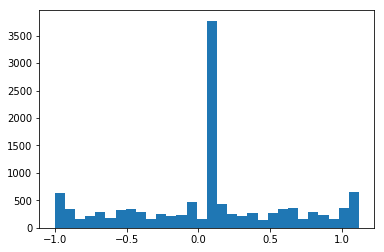

In [219]:
plt.hist(angle_labels, bins=30)
plt.show()

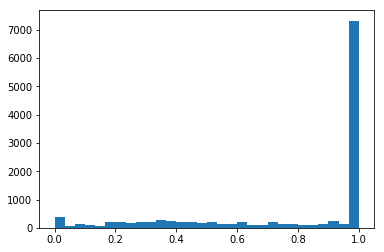

In [220]:
plt.hist(speed_labels, bins=30)
plt.show()

In [221]:
def AnglePredCnn():
    img_in = Input(shape=(120, 160, 3), name='img_in')                      # First layer, input layer, Shape comes from camera.py resolution, RGB
    x = img_in
    x = Convolution2D(24, (5,5), strides=(2,2), activation='relu')(x)       # 24 features, 5 pixel x 5 pixel kernel (convolution, feauture) window, 2wx2h stride, relu activation
    x = Convolution2D(32, (5,5), strides=(2,2), activation='relu')(x)       # 32 features, 5px5p kernel window, 2wx2h stride, relu activatiion
    x = Convolution2D(64, (5,5), strides=(2,2), activation='relu')(x)       # 64 features, 5px5p kernal window, 2wx2h stride, relu
    x = Convolution2D(64, (3,3), strides=(2,2), activation='relu')(x)       # 64 features, 3px3p kernal window, 2wx2h stride, relu
    x = Convolution2D(64, (3,3), strides=(1,1), activation='relu')(x)       # 64 features, 3px3p kernal window, 1wx1h stride, relu

    # Possibly add MaxPooling (will make it less sensitive to position in image).  Camera angle fixed, so may not to be needed

    x = Flatten(name='flattened')(x)                                        # Flatten to 1D (Fully connected)
    x = Dense(100, activation='linear')(x)                                    # Classify the data into 100 features, make all negatives 0
    x = Dropout(.1)(x)                                                      # Randomly drop out (turn off) 10% of the neurons (Prevent overfitting)
    x = Dense(50, activation='linear')(x)                                     # Classify the data into 50 features, make all negatives 0
    x = Dropout(.1)(x)                                                      # Randomly drop out 10% of the neurons (Prevent overfitting)
    #categorical output of the angle
    angle_out = Dense(1, activation='linear', name='angle_out')(x)        # Connect every input with every output and output 15 hidden units. Use Softmax to give percentage. 15 categories and find best one based off percentage 0.0-1.0
    
    #continous output of throttle
    throttle_out = Dense(1, activation='linear', name='throttle_out')(x)      # Reduce to 1 number, Positive number only
    #out = Dense(2, activation='linear', name='model_outputs')(x)
    model = Model(inputs=[img_in], outputs=[angle_out, throttle_out])#outputs=[out])
    model.compile(optimizer='adam',
                  loss={'angle_out': 'mean_squared_error',
                        'throttle_out': 'mean_squared_error'},
                  #loss={'model_outputs' : 'mean_squared_error'})
                  loss_weights={'angle_out': 0.9, 'throttle_out': .001})
    return model

In [222]:
model = AnglePredCnn()

In [ ]:
model_path = os.path.abspath("models/speed_model.h5")
checkpointer = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', mode='min')
hist = model.fit_generator(generator=gen_train,
                           validation_data=gen_test,
                           steps_per_epoch=(sep_train / BATCH_SIZE),
                           validation_steps=(sep_test / BATCH_SIZE),
                           epochs=10,
                           shuffle=True,
                           callbacks=[checkpointer])

Epoch 1/10
609/608 [==============================] - 569s 934ms/step - loss: 8.3865 - angle_out_loss: 9.3168 - throttle_out_loss: 1.3300 - val_loss: 0.1613 - val_angle_out_loss: 0.1788 - val_throttle_out_loss: 0.3206
Epoch 2/10
450/608 [=====================>........] - ETA: 2:03 - loss: 0.1221 - angle_out_loss: 0.1354 - throttle_out_loss: 0.2266

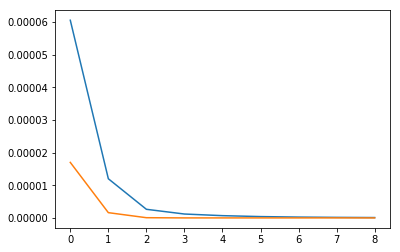

In [147]:
plt.plot(hist.history["loss"][1:])
plt.plot(hist.history["val_loss"][1:])
plt.show()

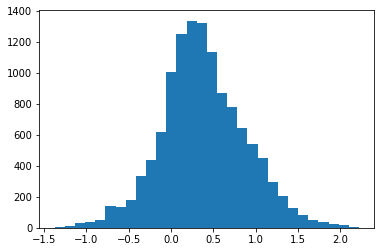

In [145]:
plt.hist(model.predict(data)[0], bins=30)
plt.show()

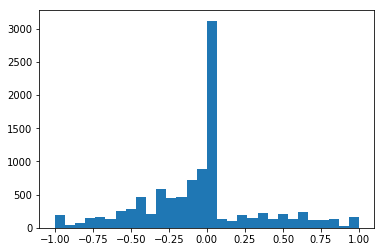

In [18]:
plt.hist(labels, bins=30)
plt.show()

In [45]:
data.shape

(1381, 120, 160, 3)

In [46]:
labels.shape

(1381,)

In [106]:
mask = np.where((labels > -0.08) & (labels < 0.08))
mask = (np.random.choice(mask[0], int(2 * mask[0].shape[0] / 3), replace=False),)

maska = np.ones(labels.shape,dtype=bool)
maska[mask] = False

In [107]:
labels[maska].shape

(936,)

In [108]:
labels = labels[maska]
data = data[maska]

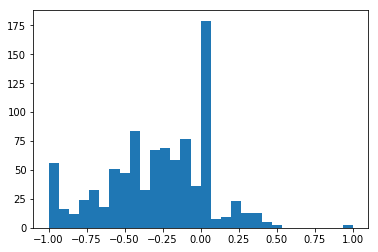

In [109]:
plt.hist(labels, bins=30)
plt.show()

In [183]:
test = myGenerator(image_paths, labels, 16)
for j in range(0, 4):
    x, y = next(test)
    print(x.shape)
    print(y.shape)

(16, 120, 160, 3)
(16,)
(16, 120, 160, 3)
(16,)
(16, 120, 160, 3)
(16,)
(16, 120, 160, 3)
(16,)
